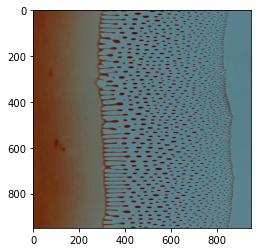

In [54]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("polarImg.tiff")

plt.imshow(img)
plt.show()


https://docs.opencv.org/3.4/dd/dd7/tutorial_morph_lines_detection.html

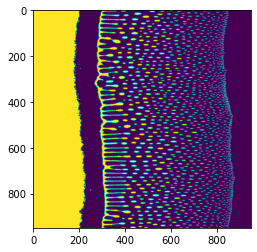

In [55]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th,otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(otsu)
plt.show()

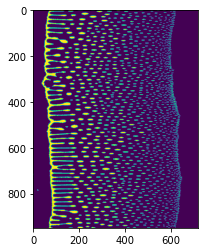

In [56]:
otsu = otsu[:, 230:-1]
plt.imshow(otsu)
plt.show()

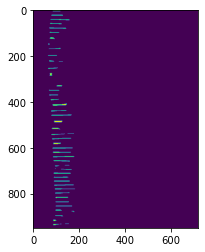

In [57]:
horizontal = otsu.copy()

# Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols // 20 # same as int(cols/x)
# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
# Apply morphology operations
horizontal = cv2.erode(horizontal, horizontalStructure)

plt.imshow(horizontal)
plt.show()

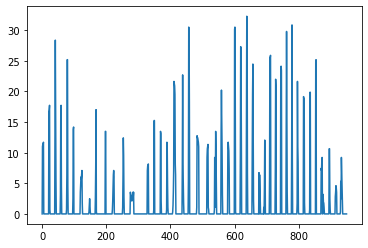

In [58]:
signal = np.mean(horizontal, axis=1)

plt.plot(signal)

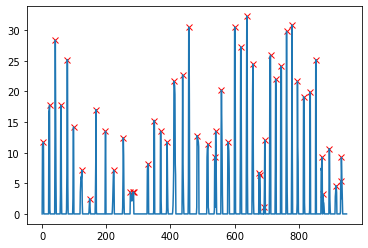

In [61]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(signal, prominence=1)

plt.plot(peaks, signal[peaks], "xr")
plt.plot(signal)

In [66]:
delta = np.diff(peaks)
mean_finger = np.mean(delta)

print(f"Lambda = {mean_finger}pix")

Lambda = 18.58pix
